# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
cities

['barnstaple',
 'taolanaro',
 'puerto ayora',
 'sidi ali',
 'hilo',
 'hasaki',
 'santarem',
 'ushuaia',
 'albany',
 'atuona',
 'rikitea',
 'ostrovnoy',
 'samusu',
 'walvis bay',
 'tabiauea',
 'fukue',
 'carnarvon',
 'butaritari',
 'lebu',
 'port elizabeth',
 'barcelos',
 'bethel',
 'busselton',
 'klyuchi',
 'dingle',
 'shimoda',
 'shache',
 'vaini',
 'hermanus',
 'harbin',
 'la malbaie',
 'kapaa',
 'saint george',
 'te anau',
 'punta arenas',
 'mahebourg',
 'saint-philippe',
 'bluff',
 'corinto',
 'illoqqortoormiut',
 'port alfred',
 'meulaboh',
 'sobolevo',
 'fortuna',
 'bay roberts',
 'gardan diwal',
 'mataura',
 'tuktoyaktuk',
 'pisco',
 'barrow',
 'cape town',
 'jizan',
 'mareeba',
 'castro',
 'tchibanga',
 'vardo',
 'pevek',
 'bambous virieux',
 'ancud',
 'daru',
 'weihai',
 'santa cruz',
 'vestmannaeyjar',
 'dikson',
 'souillac',
 'nizhneyansk',
 'victoria',
 'turbat',
 'salym',
 'cagayan de tawi-tawi',
 'ambulu',
 'marinette',
 'oakdale',
 'dukat',
 'portland',
 'rudno',
 'baiyi

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

count = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    try: 
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        cityname = response["name"]
        print(f"Processing Record {count} of Set {count} | {cityname}")
        
        count= count + 1
        
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
        
print(f"-------------------------------")     
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Barnstaple
City not found. Skipping...
Processing Record 2 of Set 2 | Puerto Ayora
Processing Record 3 of Set 3 | Sidi Ali
Processing Record 4 of Set 4 | Hilo
Processing Record 5 of Set 5 | Hasaki
City not found. Skipping...
Processing Record 6 of Set 6 | Ushuaia
Processing Record 7 of Set 7 | Albany
Processing Record 8 of Set 8 | Atuona
Processing Record 9 of Set 9 | Rikitea
Processing Record 10 of Set 10 | Ostrovnoy
City not found. Skipping...
Processing Record 11 of Set 11 | Walvis Bay
City not found. Skipping...
Processing Record 12 of Set 12 | Fukue
Processing Record 13 of Set 13 | Carnarvon
Processing Record 14 of Set 14 | Butaritari
Processing Record 15 of Set 15 | Lebu
Processing Record 16 of Set 16 | Port Elizabeth
Processing Record 17 of Set 17 | Barcelos
Processing Record 18 of Set 18 | Bethel
Processing Record 19 of Set 19 | Busselton
Processing Record 20 of Set 20 | Klyuchi
Processing R

Processing Record 177 of Set 177 | Igrim
Processing Record 178 of Set 178 | Praia da Vitoria
Processing Record 179 of Set 179 | Kaitangata
Processing Record 180 of Set 180 | Aginskoye
Processing Record 181 of Set 181 | Pangnirtung
Processing Record 182 of Set 182 | Ilulissat
Processing Record 183 of Set 183 | Westerland
Processing Record 184 of Set 184 | Havelock
Processing Record 185 of Set 185 | Juneau
Processing Record 186 of Set 186 | Kavieng
Processing Record 187 of Set 187 | Palmer
Processing Record 188 of Set 188 | Clarence Town
Processing Record 189 of Set 189 | Tura
Processing Record 190 of Set 190 | Atar
Processing Record 191 of Set 191 | Ribeira Grande
Processing Record 192 of Set 192 | Bandarbeyla
Processing Record 193 of Set 193 | Tasiilaq
Processing Record 194 of Set 194 | Port Hedland
Processing Record 195 of Set 195 | Nanortalik
Processing Record 196 of Set 196 | Paamiut
Processing Record 197 of Set 197 | Buraydah
Processing Record 198 of Set 198 | Garowe
Processing Rec

Processing Record 355 of Set 355 | Terrace
Processing Record 356 of Set 356 | The Valley
Processing Record 357 of Set 357 | Ust-Tsilma
Processing Record 358 of Set 358 | Horsham
City not found. Skipping...
Processing Record 359 of Set 359 | Vila Velha
Processing Record 360 of Set 360 | Freeport
Processing Record 361 of Set 361 | Almaznyy
Processing Record 362 of Set 362 | Abha
Processing Record 363 of Set 363 | Waingapu
Processing Record 364 of Set 364 | Nueva Guinea
Processing Record 365 of Set 365 | Ingham
Processing Record 366 of Set 366 | Aquiraz
Processing Record 367 of Set 367 | Araouane
City not found. Skipping...
Processing Record 368 of Set 368 | Marrakesh
Processing Record 369 of Set 369 | Anadyr
Processing Record 370 of Set 370 | Merauke
Processing Record 371 of Set 371 | Tiksi
Processing Record 372 of Set 372 | San
Processing Record 373 of Set 373 | Heihe
Processing Record 374 of Set 374 | Atambua
Processing Record 375 of Set 375 | Byron Bay
Processing Record 376 of Set 376

Processing Record 530 of Set 530 | Chapais
City not found. Skipping...
Processing Record 531 of Set 531 | Narayanpet
Processing Record 532 of Set 532 | Canyon Lake
Processing Record 533 of Set 533 | Mwinilunga
Processing Record 534 of Set 534 | Tall Kayf
Processing Record 535 of Set 535 | Hare Bay
Processing Record 536 of Set 536 | Kushima
Processing Record 537 of Set 537 | Port Macquarie
Processing Record 538 of Set 538 | Cedar City
Processing Record 539 of Set 539 | West Wendover
Processing Record 540 of Set 540 | Westport
Processing Record 541 of Set 541 | Talara
Processing Record 542 of Set 542 | Tynset
Processing Record 543 of Set 543 | Kungurtug
Processing Record 544 of Set 544 | Salalah
Processing Record 545 of Set 545 | Rawson
Processing Record 546 of Set 546 | Dickinson
Processing Record 547 of Set 547 | Samarai
City not found. Skipping...
Processing Record 548 of Set 548 | Kizhinga
Processing Record 549 of Set 549 | Diego de Almagro
Processing Record 550 of Set 550 | Flic en 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather = {"City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

city_data = pd.DataFrame(weather)

city_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [7]:
city_data.to_csv('cities.csv')

In [8]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barnstaple,40,GB,1569332581,64,51.08,-4.06,68.00,18.34
1,Puerto Ayora,75,EC,1569332330,77,-0.74,-90.35,69.80,14.99
2,Sidi Ali,39,DZ,1569332554,67,36.10,0.42,75.47,5.79
3,Hilo,90,US,1569332325,88,19.71,-155.08,75.20,5.82
4,Hasaki,75,JP,1569332366,94,35.73,140.83,72.00,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

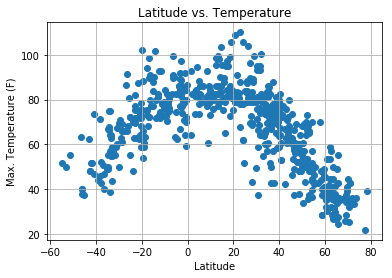

In [9]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], marker="o")

plt.title("Latitude vs. Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Temperature_Plot.png")

plt.show()

#### Latitude vs. Humidity Plot

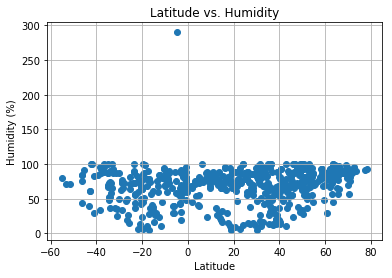

In [10]:
plt.scatter(city_data["Lat"], city_data["Humidity"], marker="o")

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Humidity_Plot.png")

plt.show()

#### Latitude vs. Cloudiness Plot

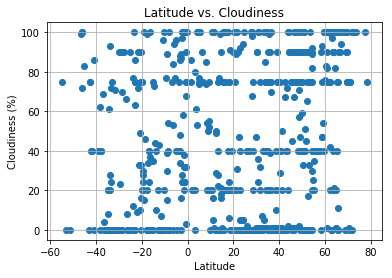

In [11]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], marker="o")

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Cloudiness_Plot.png")

plt.show()

#### Latitude vs. Wind Speed Plot

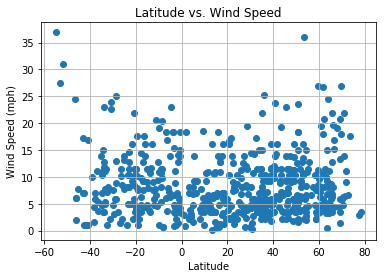

In [12]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], marker="o")

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_Wind Speed_Plot.png")

plt.show()